In [1]:
pip install nltk

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk

In [5]:
!wget https://www.dropbox.com/s/v0gmlmnxiqt1vga/Donald-Tweets%21.csv?dl=0

--2024-02-27 19:46:31--  https://www.dropbox.com/s/v0gmlmnxiqt1vga/Donald-Tweets%21.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/v0gmlmnxiqt1vga/Donald-Tweets%21.csv [following]
--2024-02-27 19:46:32--  https://www.dropbox.com/s/raw/v0gmlmnxiqt1vga/Donald-Tweets%21.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc268aa42944ef8ffd9c4b73b94f.dl.dropboxusercontent.com/cd/0/inline/COGhOMzfWdwdn0d7wGQFaQifvrkkgEIJ-D9aEH_JEj_Y4Rpwg6UMbM9GW0s41EzSUJtr9PTLVnTnsdLjfQk0tYrGpv529gJgghipf39T7yUxcxvPAA4JMai7glw-UCyEUtyB-1DwIHVc9cPjSu91ox5b/file# [following]
--2024-02-27 19:46:32--  https://uc268aa42944ef8ffd9c4b73b94f.dl.dropboxusercontent.com/cd/0/inline/COGhOMzfWdwdn0d7wGQFaQifvrkkgEIJ-D9aEH_JEj_Y4Rpwg6UMbM9GW0s41EzSUJtr9PTLV

In [6]:
tweet=pd.read_csv(r'/content/Donald-Tweets!.csv?dl=0')

In [7]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,NaN,NaN
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,NaN,NaN
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,NaN,NaN


In [8]:
tweet.drop(columns=['Unnamed: 10','Unnamed: 11'],inplace=True)

In [11]:
tweet_by_date=tweet.copy()
tweet_by_date['Date']=pd.to_datetime(tweet['Date'],yearfirst=True)
tweet_by_date['Date']=tweet_by_date['Date'].dt.month
tweet_by_date=pd.DataFrame(tweet_by_date.groupby(['Date']).size().sort_values(ascending=True).rename('Tweets'))
tweet_by_date

,Tweets
Date,
6,258
4,287
5,357
3,456
1,507
2,516
12,579
11,709
8,726


In [12]:
import string , re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [13]:
def clean_text(tweet):
  tweet = word_tokenize(tweet) # Create tokens
  tweet = tweet[4:] # Remove RT@
  tweet= " ".join(tweet) # Join tokens
  tweet= re.sub('https','',tweet) # Remove 'https' text with blank
  tweet = [char for char in tweet if char not in string.punctuation] # Remove punctuations
  tweet = ''.join(tweet) # Join the leters
  tweet = [word for word in tweet.split() if word.lower() not in stopwords.words('english')] # Remove common english words (I, you, we,...)
  return " ".join(tweet)


In [15]:
# tweet['cleaned_text']=tweet['Text_tweet'].apply(clean_text)
tweet['cleaned_text']=tweet['Tweet_Text'].apply(clean_text)

In [16]:

tweet['cleaned_text'].head()

0    deepest gratitude served armed forces ThankAVe...
1    New York soon making important decisions peopl...
2    small groups protesters last night passion gre...
3    open successful presidential election professi...
4    DC Met President Obama first time Really good ...
Name: cleaned_text, dtype: object

In [18]:
features = tweet['cleaned_text']
processed_features = []

for sentence in range(0, len(features)):
  processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
  processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
  processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
  processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
  processed_feature = processed_feature.lower()
  processed_features.append(processed_feature)

In [19]:
tweet['processed_text']=processed_features

In [20]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...


In [26]:
processed_text_ngrams=list(nltk.ngrams(tweet['processed_text'],8))

In [27]:
processed_text_ngrams[:3]

[('deepest gratitude served armed forces thankavet tcowpk7qwpk8z',
  'new york soon making important decisions people running government',
  'small groups protesters last night passion great country come together proud',
  'open successful presidential election professional protesters incited media protesting unfair',
  'dc met president obama first time really good meeting great chemistry melania liked mrs lot',
  'us marine corps thank service tcolz2dhrxzo4',
  'important evening forgotten man woman never forgotten come together never',
  '945pm electionnight maga tcohfujerzbod'),
 ('new york soon making important decisions people running government',
  'small groups protesters last night passion great country come together proud',
  'open successful presidential election professional protesters incited media protesting unfair',
  'dc met president obama first time really good meeting great chemistry melania liked mrs lot',
  'us marine corps thank service tcolz2dhrxzo4',
  'importan

In [28]:
from nltk.stem.porter import PorterStemmer
def get_stemmed_text(corpus):
  stemmer=PorterStemmer()
  return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]
tweet['stemmedtext(porter)']=get_stemmed_text(tweet['processed_text'])

In [29]:
from nltk.stem import LancasterStemmer
def get_stemmed_text(corpus):
  stemmer = LancasterStemmer()
  return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]
tweet['stemmedtext(lancaster)'] = get_stemmed_text(tweet['processed_text'])


In [30]:
from nltk.stem import SnowballStemmer
def get_stemmed_text(corpus):
  stemmer = SnowballStemmer('english')
  return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

tweet['stemmedtext(snowball)'] = get_stemmed_text(tweet['processed_text'])


In [31]:
from nltk.stem import WordNetLemmatizer
def get_lemmatized_text(corpus):
  lemmatizer = WordNetLemmatizer()
  return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

tweet['lemmatext'] = get_lemmatized_text(tweet['processed_text'])


In [32]:
tweet['lemma_str']=[' '.join(map(str,l)) for l in tweet['lemmatext']]
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...,s m a l l g r o u p p r o t e s t e r l ...
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...,o p e n s u c c e s s f u l p r e s i d e ...
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...,d c m e t p r e s i d e n t o b a m a ...


In [33]:
tweet['word_count'] = tweet['lemmatext'].apply(lambda x: len(str(x).split()))
tweet['review_len'] = tweet['lemma_str'].astype(str).apply(len)
tweet.head()


,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str,word_count,review_len
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...,7,119
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...,9,129
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...,s m a l l g r o u p p r o t e s t e r l ...,11,147
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...,o p e n s u c c e s s f u l p r e s i d e ...,10,185
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...,d c m e t p r e s i d e n t o b a m a ...,15,179


In [34]:
from textblob import TextBlob
def generate_polarity(text):
  sentiment=TextBlob(text).sentiment
  return sentiment

In [35]:
sentiment = tweet['lemmatext'].apply(generate_polarity)
sentiment = sentiment.to_frame()
sentiment.head()


,lemmatext
0,"(0.0, 0.0)"
1,"(0.2681818181818182, 0.7272727272727273)"
2,"(0.3375, 0.5541666666666667)"
3,"(0.0875, 0.6375)"
4,"(0.5875, 0.6208333333333333)"


In [37]:
tweet['sentiment_score']=sentiment
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str,word_count,review_len,sentiment_score
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...,7,119,"(0.0, 0.0)"
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...,9,129,"(0.2681818181818182, 0.7272727272727273)"
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...,s m a l l g r o u p p r o t e s t e r l ...,11,147,"(0.3375, 0.5541666666666667)"
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...,o p e n s u c c e s s f u l p r e s i d e ...,10,185,"(0.0875, 0.6375)"
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...,d c m e t p r e s i d e n t o b a m a ...,15,179,"(0.5875, 0.6208333333333333)"


In [38]:
sentiment['polarity'] = sentiment['lemmatext'].apply(lambda x:x[0])

In [39]:
tweet['polarity']=sentiment['polarity']

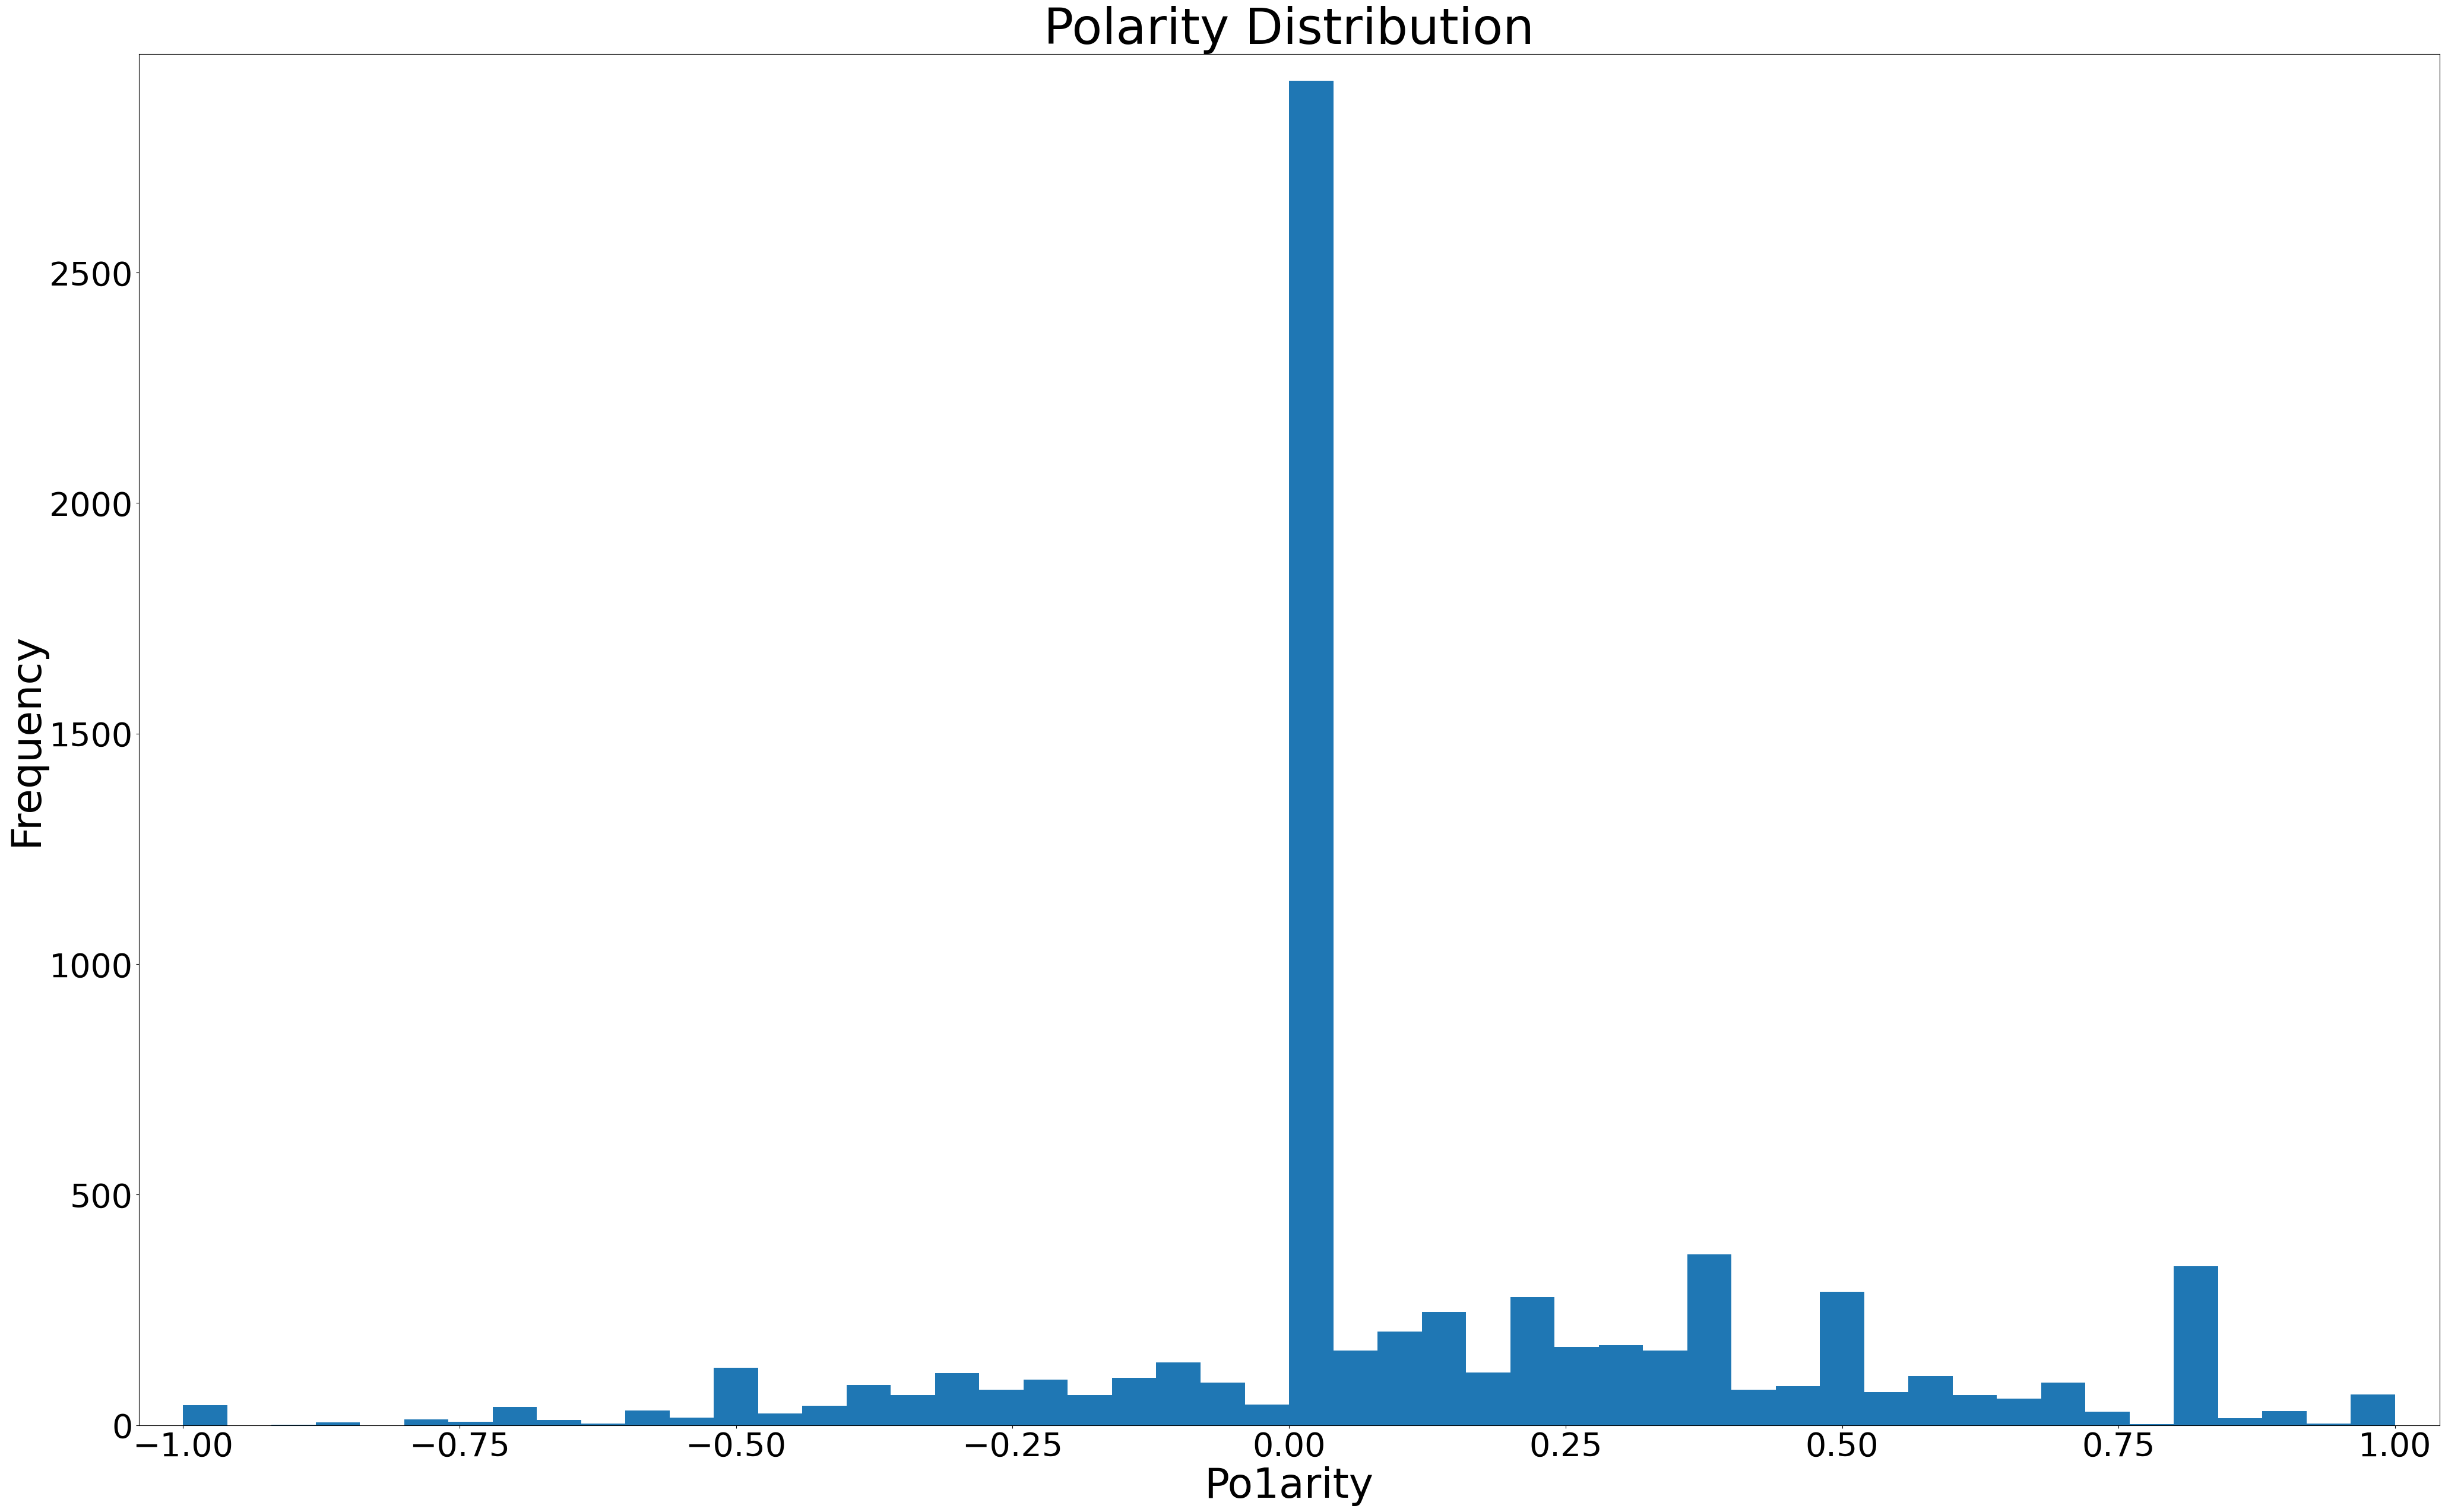

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Po1arity', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(tweet['polarity'], bins=50)
plt.title('Polarity Distribution', fontsize=60)
plt.show()

In [47]:
tweet['polarity_encoded'] = ['positive' if x > 0 else 'negative' if x < 0 else 'neutra1' for x in tweet['polarity']]

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase=True,ngram_range = (1,1),stop_words='english')


In [50]:
X = tweet['processed_text']
y = tweet['polarity_encoded']

In [53]:
X_vect = vectorizer.fit_transform(X)
df_vect = pd.DataFrame(X_vect.toarray(),columns=vectorizer.get_feature_names_out())
print(df_vect.head())
print(df_vect.shape)


    00  007llisav  00patriot   08  08102015   09   10  100  1000  10000  ...  \
0  0.0        0.0        0.0  0.0       0.0  0.0  0.0  0.0   0.0    0.0  ...   
1  0.0        0.0        0.0  0.0       0.0  0.0  0.0  0.0   0.0    0.0  ...   
2  0.0        0.0        0.0  0.0       0.0  0.0  0.0  0.0   0.0    0.0  ...   
3  0.0        0.0        0.0  0.0       0.0  0.0  0.0  0.0   0.0    0.0  ...   
4  0.0        0.0        0.0  0.0       0.0  0.0  0.0  0.0   0.0    0.0  ...   

   zogby  zone  zones  zucker  zuckerman  zuckermans  ωtime   ԍԍ  ԏԏԏ   լլ  
0    0.0   0.0    0.0     0.0        0.0         0.0    0.0  0.0  0.0  0.0  
1    0.0   0.0    0.0     0.0        0.0         0.0    0.0  0.0  0.0  0.0  
2    0.0   0.0    0.0     0.0        0.0         0.0    0.0  0.0  0.0  0.0  
3    0.0   0.0    0.0     0.0        0.0         0.0    0.0  0.0  0.0  0.0  
4    0.0   0.0    0.0     0.0        0.0         0.0    0.0  0.0  0.0  0.0  

[5 rows x 11765 columns]
(7375, 11765)


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_vect, y,test_size=0.20,random_state = 7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(5900, 11765)
(1475, 11765)
(5900,)
(1475,)


In [55]:
del X_vect
del df_vect

In [56]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
from sklearn.model_selection import cross_val_score,KFold
#machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


models=[]
models.append(('knn',KNeighborsClassifier()))

#models.append(('lr',LogisticRegression()))
models.append(('Random Forest',RandomForestClassifier()))
#models.append(('gradient boosting classifier',GradientBoostingClassifier()))




for name,model in models:
  kfold=KFold(n_splits=5,random_state=7,shuffle=True)
  cross_val_sc=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=kfold)
  print('{} : acc: {}(standard deviation: {})'.format(name,cross_val_sc.mean(),cross_val_sc.std()))


knn : acc: 0.39915254237288134(standard deviation: 0.010239869469147936)
Random Forest : acc: 0.821864406779661(standard deviation: 0.003188964020716401)


In [62]:
print("The most positive tweet:",tweet.iloc[tweet['polarity'].idxmax()]['processed_text'])
print("The most negative tweet:",tweet.iloc[tweet['polarity'].idxmin()]['processed_text'])

The most positive tweet: thank law enforcement officers vpdebate police officers best us mikepence
The most negative tweet: lead border securityno solutions ideas credibilityshe supported nafta worst deal us history debate


In [61]:
sent= tweet.iloc[tweet['polarity'].idxmax()]['processed_text']
sent_tokens= word_tokenize(sent)

In [63]:
for token in sent_tokens:
  print(nltk.pos_tag([token]))


[('thank', 'NN')]
[('law', 'NN')]
[('enforcement', 'NN')]
[('officers', 'NNS')]
[('vpdebate', 'NN')]
[('police', 'NNS')]
[('officers', 'NNS')]
[('best', 'JJS')]
[('us', 'PRP')]
[('mikepence', 'NN')]


In [64]:
sent= tweet.iloc[tweet['polarity'].idxmin()]['processed_text']
sent_tokens= word_tokenize(sent)

In [65]:
for token in sent_tokens:
  print(nltk.pos_tag([token]))


[('lead', 'NN')]
[('border', 'NN')]
[('securityno', 'NN')]
[('solutions', 'NNS')]
[('ideas', 'NNS')]
[('credibilityshe', 'NN')]
[('supported', 'VBN')]
[('nafta', 'NN')]
[('worst', 'JJS')]
[('deal', 'NN')]
[('us', 'PRP')]
[('history', 'NN')]
[('debate', 'NN')]


In [66]:
from nltk import ne_chunk
ne_sent=tweet.iloc[tweet['polarity'].idxmax()]['processed_text']
ne_tokens = word_tokenize(ne_sent)
ne_tags= nltk.pos_tag(ne_tokens)
ne_ner= ne_chunk(ne_tags)
print(ne_ner)


(S
  thank/NN
  law/NN
  enforcement/NN
  officers/NNS
  vpdebate/VBP
  police/NNS
  officers/NNS
  best/VBP
  us/PRP
  mikepence/NN)


In [67]:
from nltk import ne_chunk
ne_sent=tweet.iloc[tweet['polarity'].idxmin()]['processed_text']
ne_tokens = word_tokenize(ne_sent)
ne_tags= nltk.pos_tag(ne_tokens)
ne_ner= ne_chunk(ne_tags)
print(ne_ner)


(S
  lead/JJ
  border/NN
  securityno/JJ
  solutions/NNS
  ideas/NNS
  credibilityshe/VBP
  supported/VBD
  nafta/JJ
  worst/JJS
  deal/VB
  us/PRP
  history/NN
  debate/NN)
